## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from scipy.spatial.distance import cdist 
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("E:\ExcelR Assignment\Assignment 7 - Clustering\crime_data.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
df=df.rename(columns={"Unnamed: 0":"US_State"})

In [4]:
df.head()

,US_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
df.isnull().sum()

US_State    0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

## EDA

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Murder', ylabel='Density'>

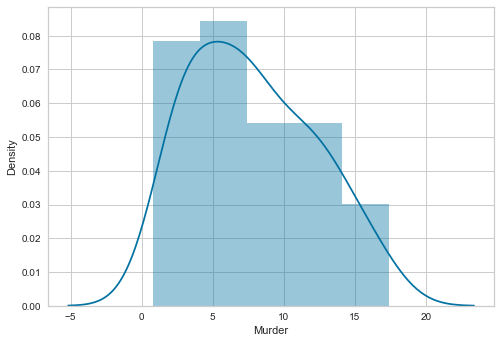

In [6]:
sns.distplot(df['Murder'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Assault', ylabel='Density'>

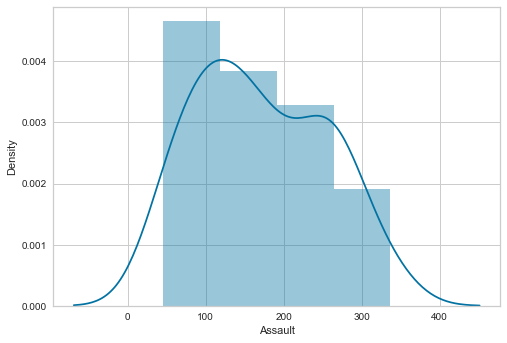

In [7]:
sns.distplot(df['Assault'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

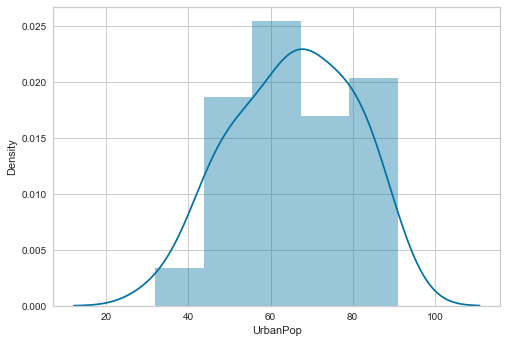

In [8]:
sns.distplot(df['UrbanPop'])

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rape', ylabel='Density'>

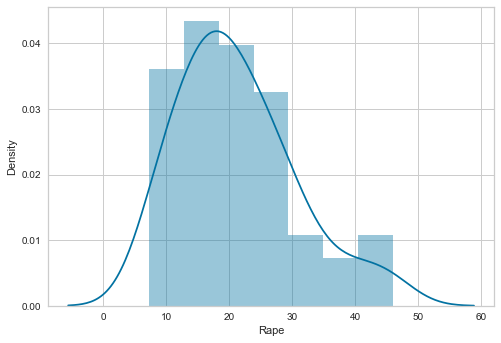

In [9]:
sns.distplot(df['Rape'])

#### Almost all variables look Normally Distributed

<AxesSubplot:>

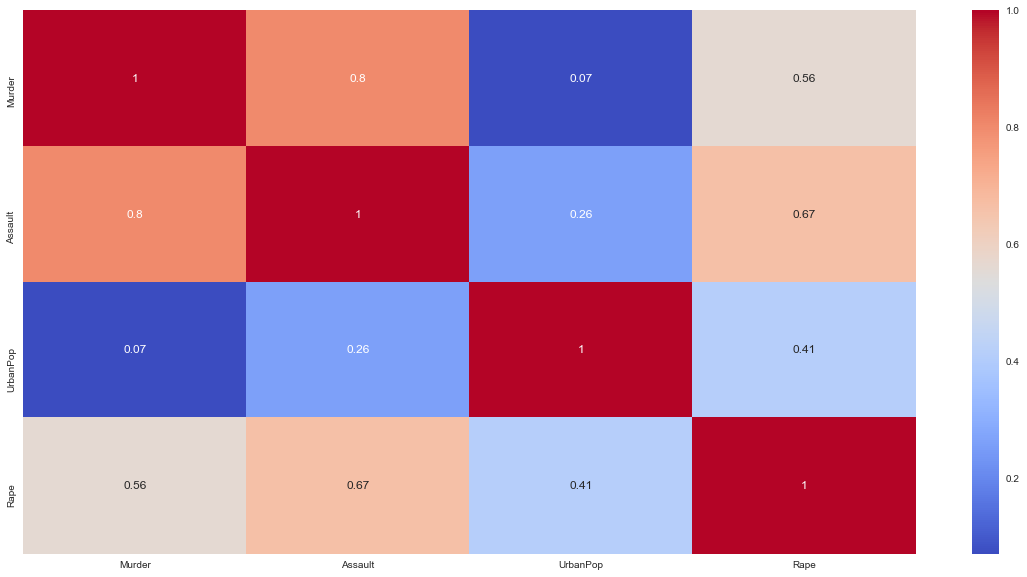

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

### Inferences:
1. Assault and Murder have good correlation of 0.8
2. Assault and Rape have moderate correlation of 0.67
2. Rape and Murder have moderate correlation of 0.56

In [6]:
df1 = df.drop(['US_State'],axis=1)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

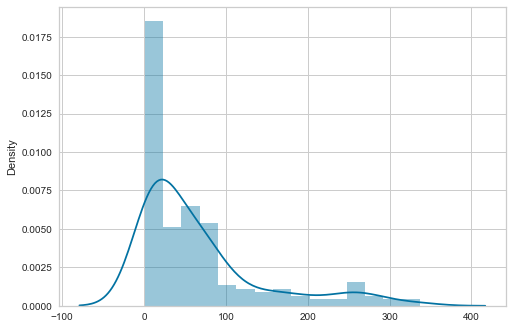

In [12]:
sns.distplot(df1)

In [13]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (50, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  2
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 3


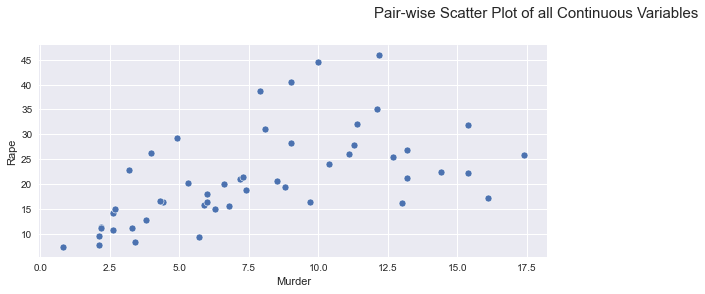

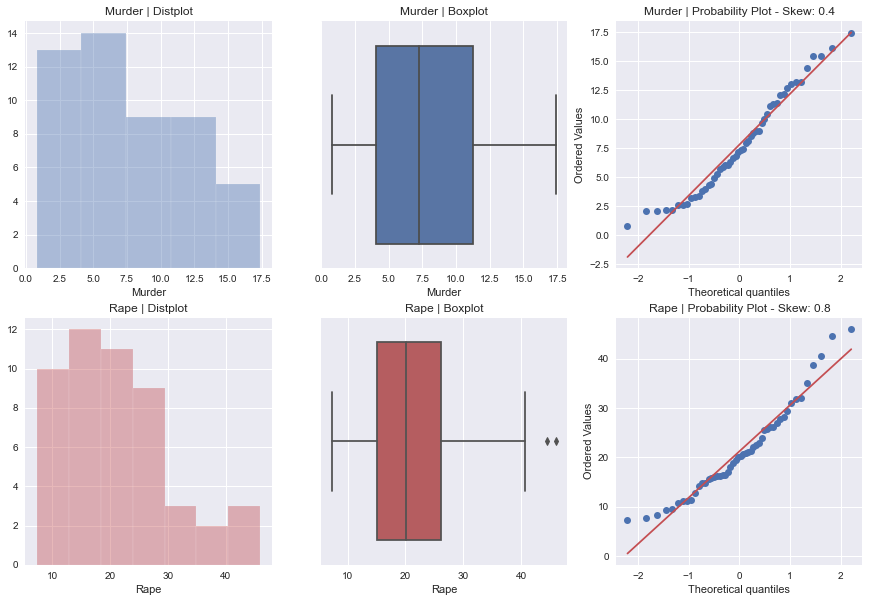

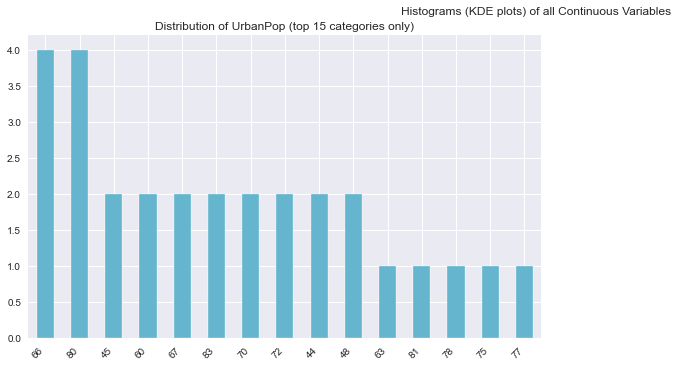

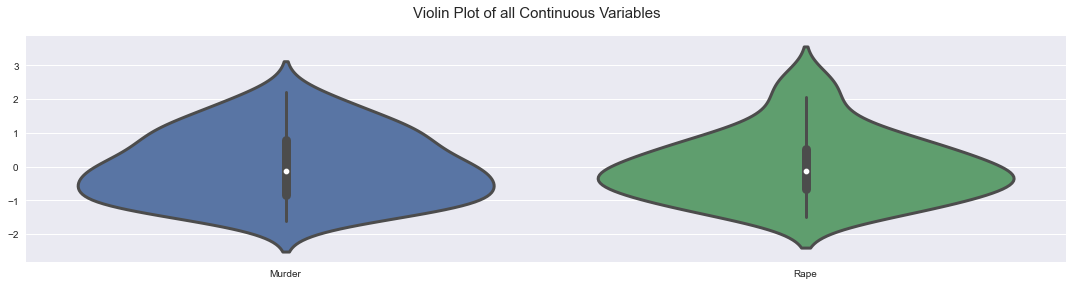

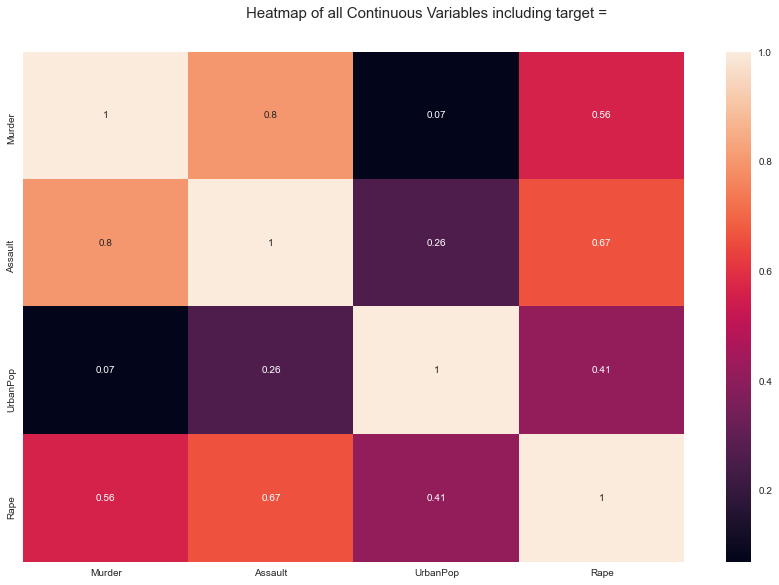

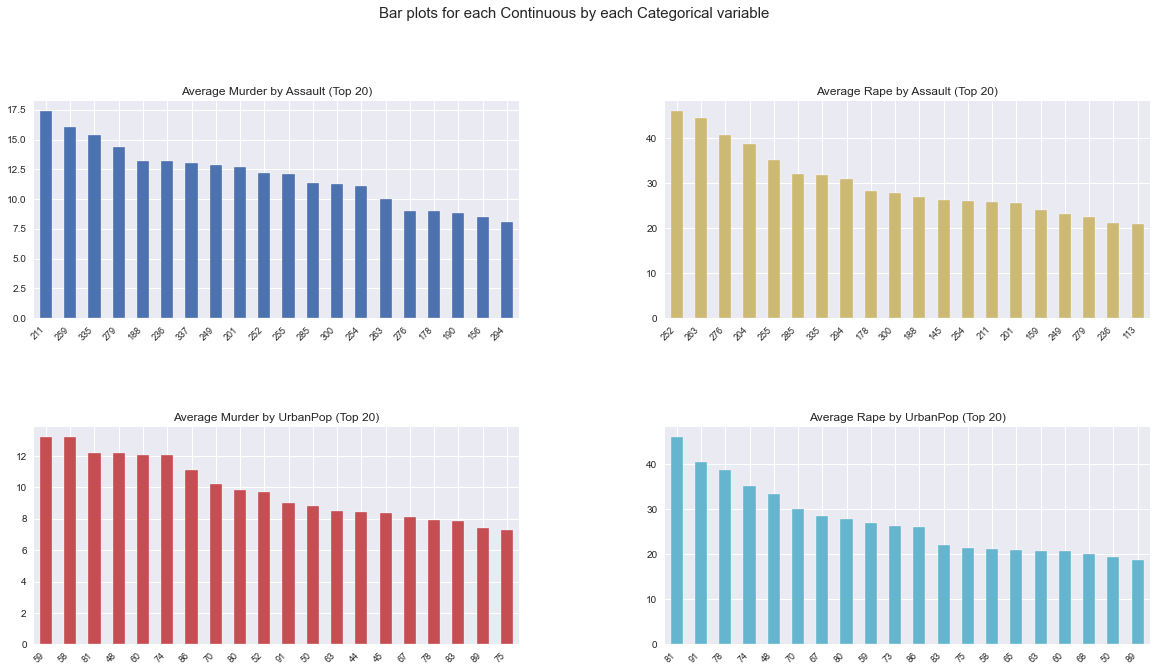

Time to run AutoViz (in seconds) = 17.794

 ###################### VISUALIZATION Completed ########################


In [14]:
df = AV.AutoViz("E:\ExcelR Assignment\Assignment 7 - Clustering\crime_data.csv")

## Normalization

In [9]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
ndf = norm_func(df1)

<AxesSubplot:ylabel='Density'>

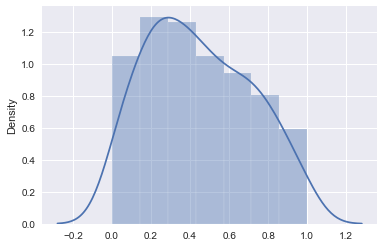

In [17]:
sns.distplot(ndf)

## Standardization

In [7]:
def stand_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [8]:
sdf = stand_func(df1)

<AxesSubplot:ylabel='Density'>

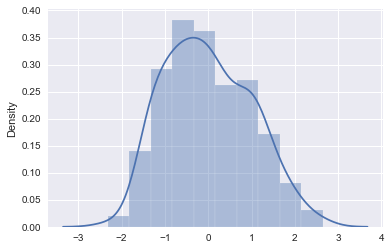

In [20]:
sns.distplot(sdf)

### We Will use Standardized Transformation as data is distributed symmetrically

## H-Clutering

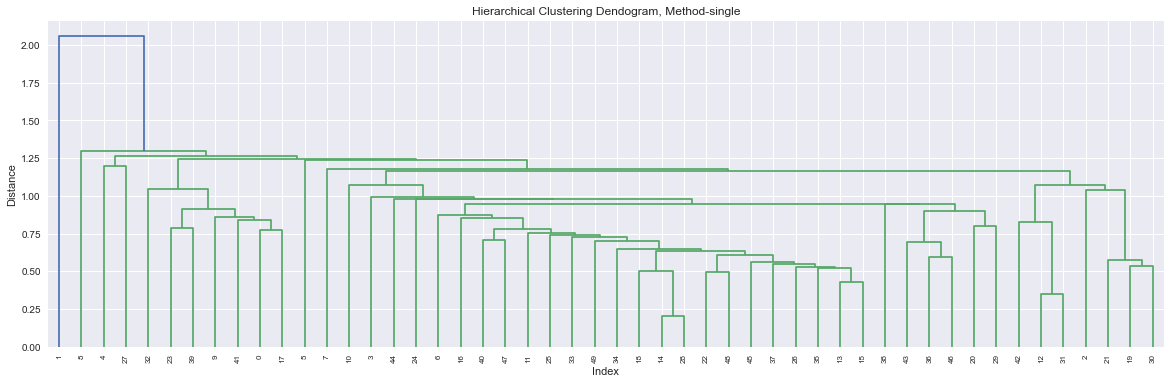

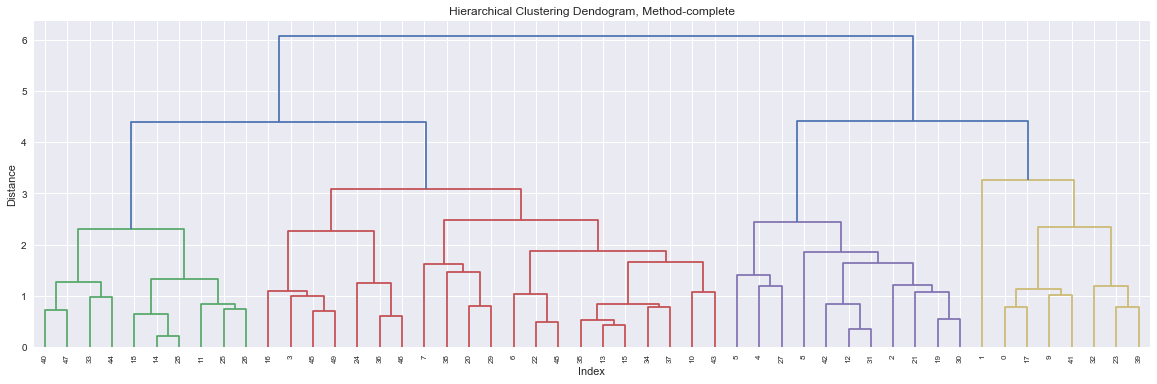

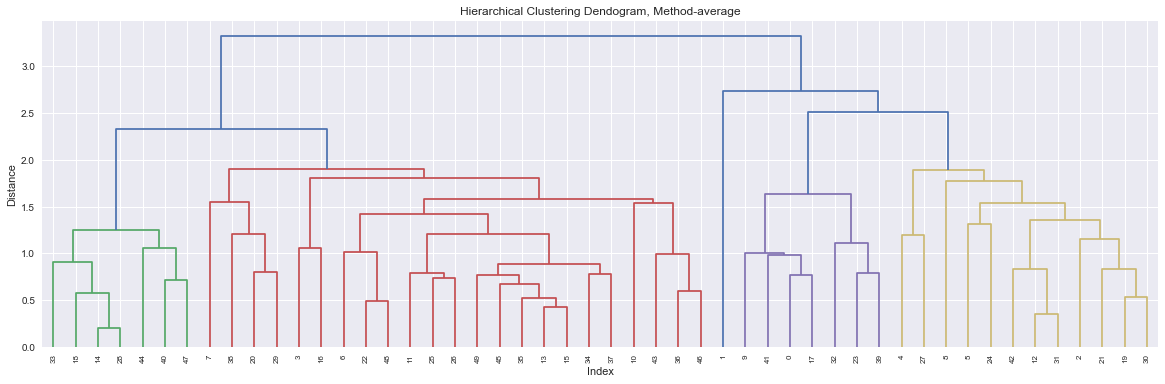

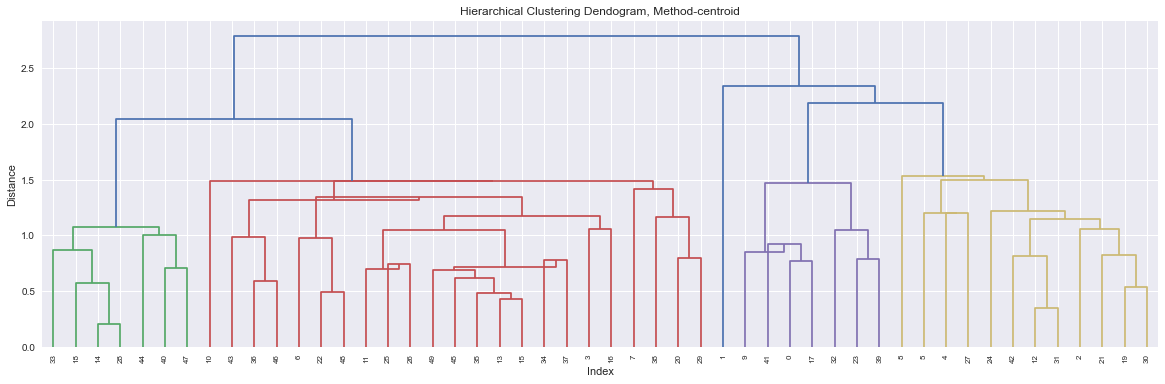

In [21]:
import scipy.cluster.hierarchy as sch
for methods in ['single','complete','average','centroid']:
    z = linkage(sdf,method=methods, metric = "euclidean")
    plt.figure(figsize=(20,6))
    plt.title('Hierarchical Clustering Dendogram, Method-{}'.format(methods))
    plt.xlabel('Index')
    plt.ylabel('Distance')
    sch.dendrogram(z)
    plt.show()

In [11]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["single","complete","average","ward"]:
        hie_cluster2 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels2 = hie_cluster2.fit_predict(sdf)
        silhouette_score1 = silhouette_score(sdf, hie_labels2)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- single : 0.2345559875315981
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.40479445025195687
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4084890326217641
For n_clusters = 2 The average silhouette_score with linkage- ward : 0.40479445025195687

For n_clusters = 3 The average silhouette_score with linkage- single : 0.14582343625170263
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3692431419043972
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3486367919047618
For n_clusters = 3 The average silhouette_score with linkage- ward : 0.31036358174027884

For n_clusters = 4 The average silhouette_score with linkage- single : 0.174058063042673
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.3159550742616455
For n_clusters = 4 The average silhouette_score with linkage- average : 0.36368194201512216

#### For H-Cluster for 4 Clusters, Silhouette_Score is 0.36

In [12]:
Hcluster = pd.Series(hie_cluster2.labels_)

In [13]:
Hdf = df.copy()
Hdf.head()

,US_State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
Hdf['HCluster'] = Hcluster
Hdf.head()

,US_State,Murder,Assault,UrbanPop,Rape,HCluster
0,Alabama,13.2,236,58,21.2,9
1,Alaska,10.0,263,48,44.5,7
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,5


In [15]:
Hdf.iloc[:,1:].groupby(Hdf.HCluster).mean()

,Murder,Assault,UrbanPop,Rape,HCluster
HCluster,,,,,
0,11.5625,271.625000,77.500000,29.187500,0
1,5.9800,125.300000,71.900000,22.210000,1
2,4.8800,166.000000,82.000000,14.060000,2
3,3.0750,81.500000,58.125000,12.675000,3
4,8.4500,154.000000,56.250000,18.025000,4
5,9.7000,244.000000,83.333333,41.766667,5
6,14.5000,291.666667,45.666667,18.566667,6
7,10.0000,263.000000,48.000000,44.500000,7
8,3.1250,65.000000,40.000000,10.150000,8


Text(0.5, 1.0, 'Clustering using H-Cluster on Standardized Data')

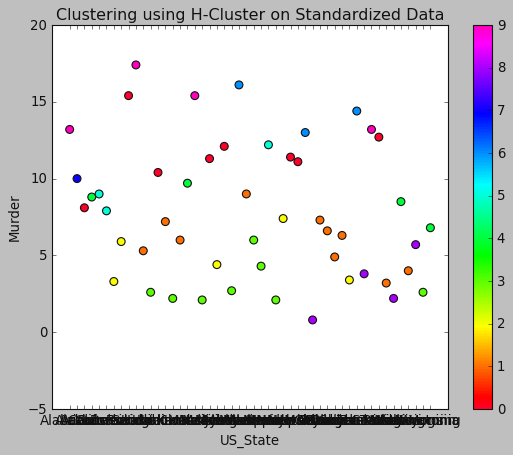

In [31]:
plt.style.use('classic')
Hdf.plot(x="US_State",y="Murder",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Cluster on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Cluster on Standardized Data')

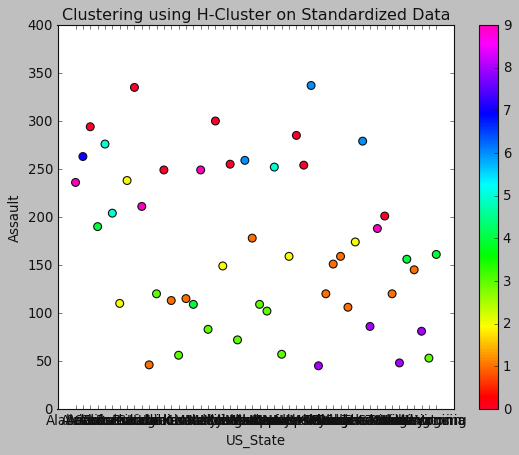

In [32]:
plt.style.use('classic')
Hdf.plot(x="US_State",y="Assault",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Cluster on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Cluster on Standardized Data')

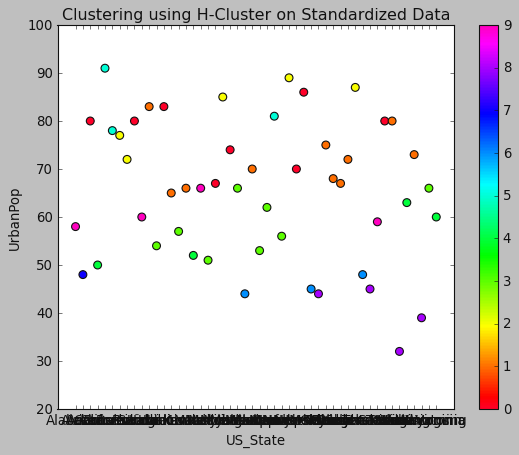

In [33]:
plt.style.use('classic')
Hdf.plot(x="US_State",y="UrbanPop",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Cluster on Standardized Data')

Text(0.5, 1.0, 'Clustering using H-Cluster on Standardized Data')

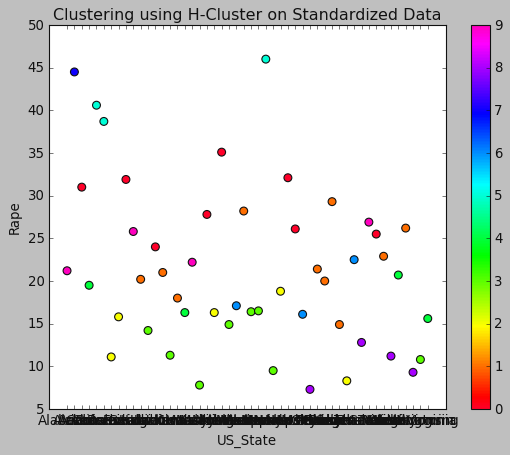

In [34]:
plt.style.use('classic')
Hdf.plot(x="US_State",y="Rape",c=hie_labels2,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using H-Cluster on Standardized Data')

## K-Means

In [16]:
model1 = KMeans(random_state=42)

In [17]:
visualizer1 = KElbowVisualizer(model1, k=(2,10), metric='distortion')
# metric = 'distortion' uses "mean sum of squared distances to centers"

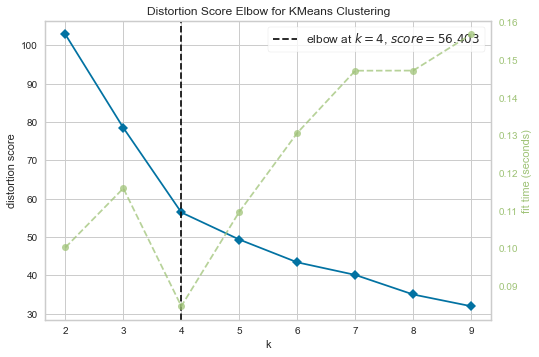

In [18]:
visualizer1.fit(sdf)    
visualizer1.poof()
plt.show()

In [19]:
k = list(range(2,10))
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(sdf)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df1.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df1.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x23375f5ba60>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

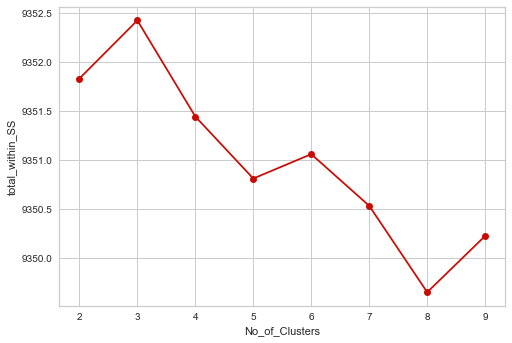

In [20]:
# Screw plot using code
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

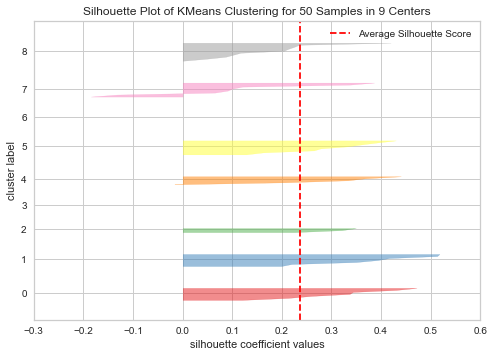

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 50 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
visualizer2 = SilhouetteVisualizer(model1,k=(2,10),metric='distortion')
visualizer2.fit(sdf)
visualizer2.poof()

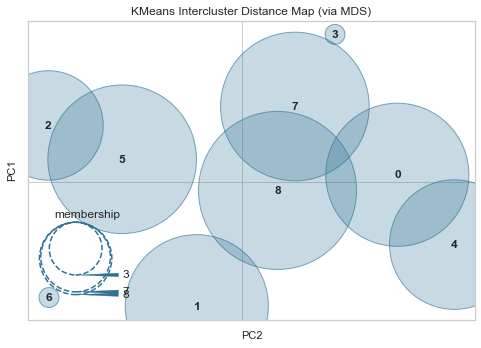

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [22]:
visualizer3=InterclusterDistance(model1,k=(2,10),metric='distortion')
visualizer3.fit(sdf)
visualizer3.show()

In [23]:
list1= [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels1 = clusterer1.fit_predict(sdf)
    sil_score1= silhouette_score(sdf, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.4084890326217641
For n_clusters = 3 The average silhouette_score is : 0.3081362264894561
For n_clusters = 4 The average silhouette_score is : 0.3396889143334439
For n_clusters = 5 The average silhouette_score is : 0.2892698909578641
For n_clusters = 6 The average silhouette_score is : 0.30057717540636925
For n_clusters = 7 The average silhouette_score is : 0.2761342454285954
For n_clusters = 8 The average silhouette_score is : 0.24606152983626525
For n_clusters = 9 The average silhouette_score is : 0.23590602327682014
For n_clusters = 10 The average silhouette_score is : 0.263670376284936


#### Elbow Curve shows k=4 appropriate and the same is reflected by silhouette_score of  0.339 for k=4
(Ignoring k=2)

In [24]:
cl = KMeans(n_clusters = 4)
y_kmeans = cl.fit_predict(sdf)
md=pd.Series(cl.labels_)  # converting numpy array into pandas series object 
Kdf = df.copy()
Kdf['KCluster']=md # creating a  new column and assigning it to new column 
Kdf.head()

,US_State,Murder,Assault,UrbanPop,Rape,KCluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1


Text(0.5, 1.0, 'Clustering using K-Means on Standardized Data')

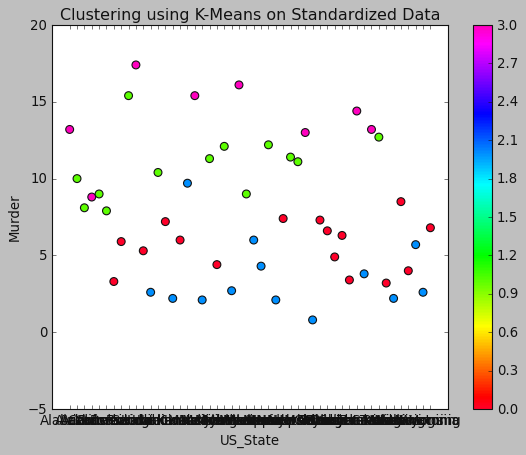

In [26]:
plt.style.use('classic')
Kdf.plot(x="US_State",y="Murder",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Standardized Data')

Text(0.5, 1.0, 'Clustering using K-Means on Standardized Data')

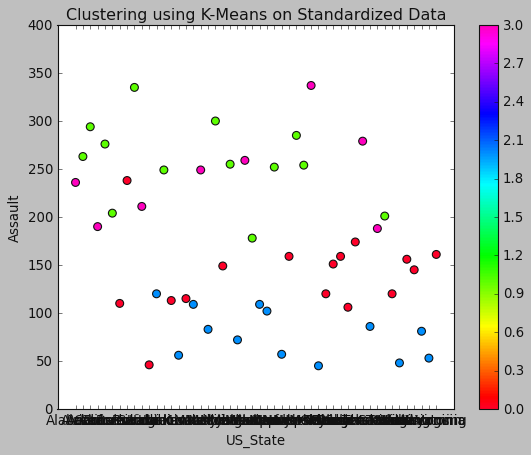

In [27]:
Kdf.plot(x="US_State",y="Assault",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Standardized Data')

Text(0.5, 1.0, 'Clustering using K-Means on Standardized Data')

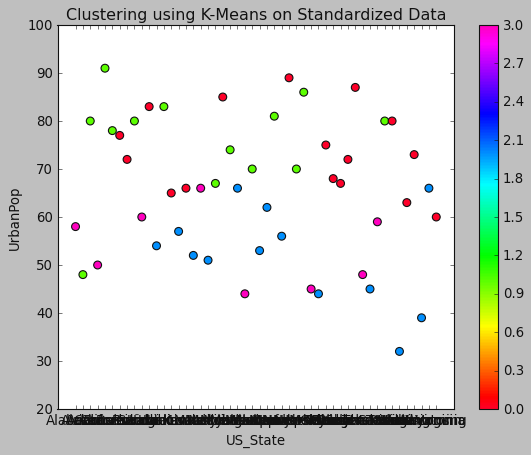

In [28]:
Kdf.plot(x="US_State",y="UrbanPop",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Standardized Data')

Text(0.5, 1.0, 'Clustering using K-Means on Standardized Data')

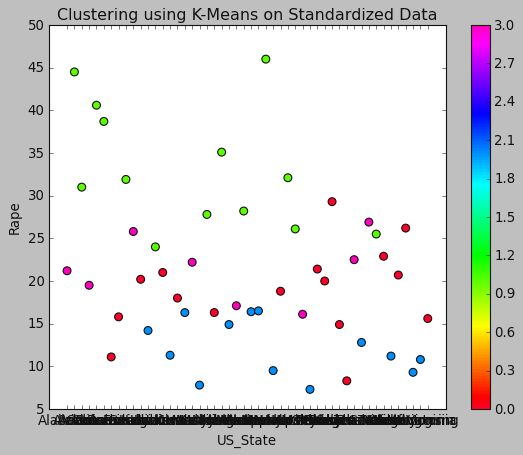

In [29]:
Kdf.plot(x="US_State",y="Rape",c=cl.labels_,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using K-Means on Standardized Data')

## DBSCAN

In [35]:
dbscan_df = DBSCAN(eps=1.2,min_samples=6)
dbscan_df.fit(sdf)

DBSCAN(eps=1.2, min_samples=6)

In [36]:
dbcluster = pd.DataFrame(dbscan_df.labels_,columns=['DBSCAN_Cluster'])
dbcluster.head()

,DBSCAN_Cluster
0,-1
1,-1
2,-1
3,0
4,-1


In [37]:
Ddf = df.copy()

In [38]:
dfDB = pd.concat([Ddf,dbcluster],axis=1)
dfDB.head()

,US_State,Murder,Assault,UrbanPop,Rape,DBSCAN_Cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,-1


In [39]:
db=dbscan_df.labels_

In [40]:
dfDB['DBSCAN_Cluster'].value_counts()

 0    32
-1    18
Name: DBSCAN_Cluster, dtype: int64

In [41]:
silhouette_score(df1,db)

0.5433757874676324

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

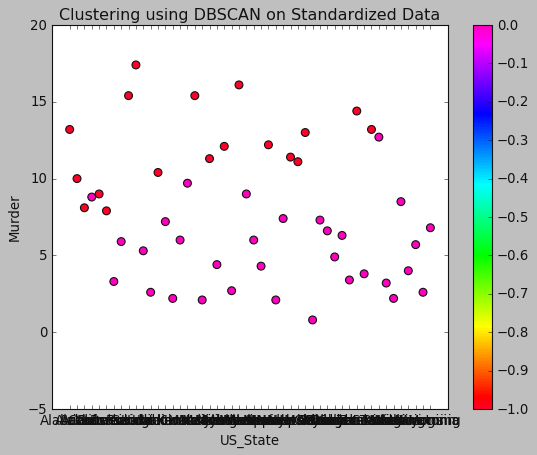

In [44]:
dfDB.plot(x="US_State",y="Murder",c=db,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

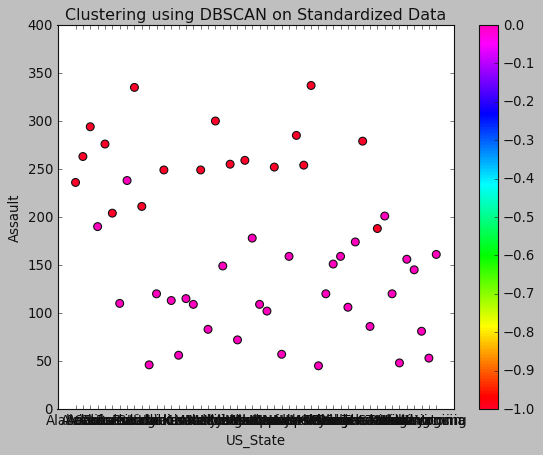

In [45]:
dfDB.plot(x="US_State",y="Assault",c=db,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

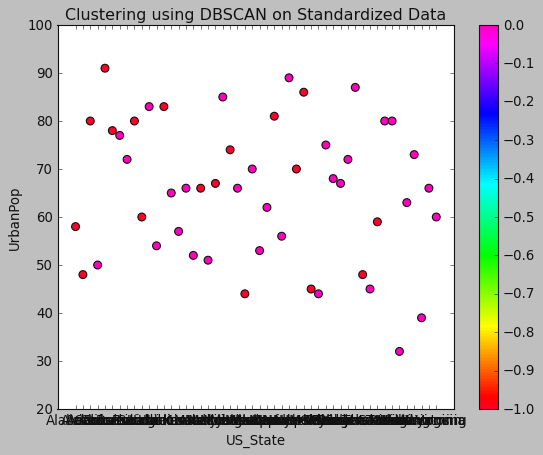

In [46]:
dfDB.plot(x="US_State",y="UrbanPop",c=db,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

Text(0.5, 1.0, 'Clustering using DBSCAN on Standardized Data')

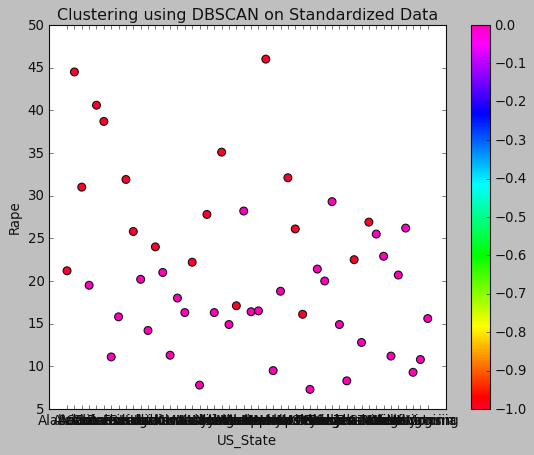

In [47]:
dfDB.plot(x="US_State",y="Rape",c=db,kind="scatter",s=50,cmap=plt.cm.gist_rainbow)
plt.title('Clustering using DBSCAN on Standardized Data')

In [48]:
#Saving the file to my local drive
dfDB.to_csv("Ddf.csv")

In [49]:
Kdf.to_csv("Kdf.csv")

In [50]:
Hdf.to_csv("Hdf.csv")